In [230]:
library(tidyverse)
library(tidytext)

In [229]:
#install.packages('tidytext')

also installing the dependencies ‘SnowballC’, ‘ISOcodes’, ‘hunspell’, ‘tokenizers’, ‘janeaustenr’, ‘stopwords’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [148]:
# E-mail corpus consists of nested folders per user with e-mails as text files
# Create list of all available e-mails
emails <- list.files("/data/enron/", full.names = T, recursive = T)
# Filter by inbox only
emails <- emails[grep("/inbox", emails)]

In [240]:
stripMessage <- function (fileName){
    list(
    paste(
    readLines(fileName, warn = FALSE),
        collapse = ' ')
        )
    }

In [264]:
df <- as_tibble(do.call(rbind, sapply(emails[1:100], stripMessage)))

In [265]:
df %>%
  select(V1) %>%
  unnest_tokens(word, V1) %>%
  count(word, sort = TRUE)

word,n
<chr>,<int>
cn,2617
enron.com,1517
enron,1401
recipients,1297
o,1283
na,1278
ou,1277
to,861
the,791


In [266]:
df %>%
  unnest_tokens(word, V1) %>%
  anti_join(stop_words) %>%
  count(word, sort = TRUE)

Joining, by = "word"


word,n
<chr>,<int>
cn,2617
enron.com,1517
enron,1401
recipients,1297
na,1278
ou,1277
allen,239
2001,232
image,228


Joining, by = "word"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


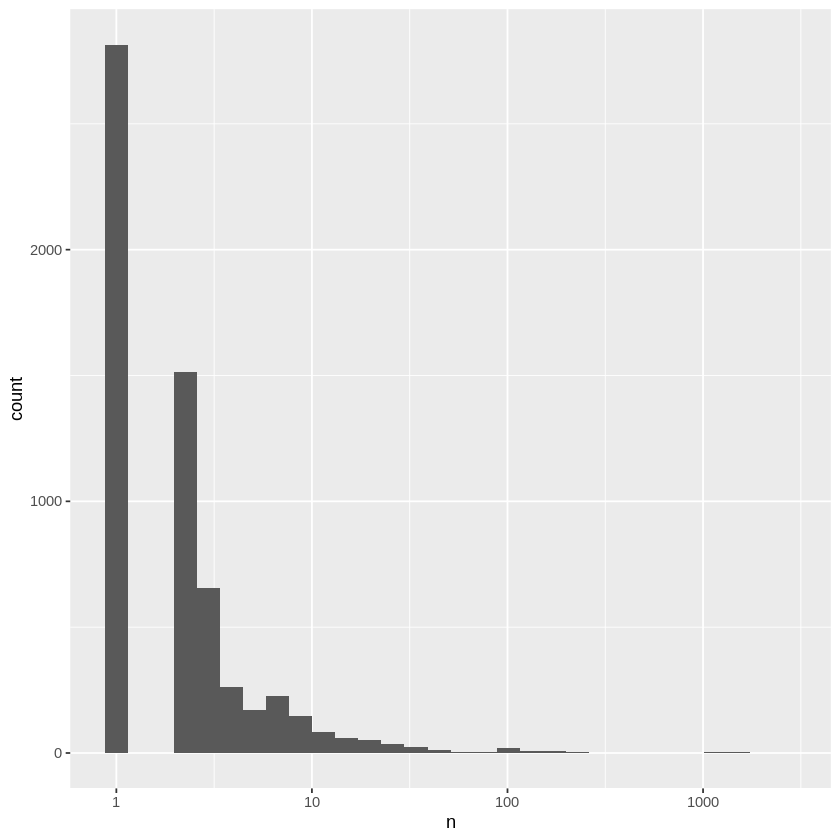

In [267]:
df %>%
  unnest_tokens(word, V1) %>%
  anti_join(stop_words) %>%
  count(word) %>%
  ggplot(aes(n)) +
  geom_histogram() +
  scale_x_log10()